# KNN REGRESSION - DECISION TREE

## CONTENTS

__1.INTRODUCTION__

__2.LIBRARIES AND DATA__
       
__3.PREPROCESSING__

__4.KNN__
             
__5.DECISION TREE__

__6.RESULTS__


## 1. INTRODUCTION

In this Jupyter Notebook, we'll make use of the  methods K-Nearest Neighbors and Decision Tree.

## 2. LIBRARIES AND DATA

In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)

__Importing data__

In [2]:
data1 = pd.read_csv("train_dataset.csv") 
data2 = pd.read_csv("test_dataset.csv") 

# Train and test Dataset
train_df = data1.copy()
test_df = data2.copy()

In [3]:
train_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,245.0,95,196.0,535.2,46870,33642,14.4,0.0,46611.30,42.0,40.4,44.3,2.31,51.1,17.2,43.0,4.7,44.1,9.6,54.6,5.4,70.2,46.0,38.5,19.5,96.374269,1.684211,0.526316,0.181287,47.898380,4.048468,0,0
1,241.0,112,182.4,408.4,36424,41459,18.8,0.0,35815.95,45.8,44.9,46.7,2.47,55.0,22.0,43.5,3.2,37.2,11.6,47.7,9.2,52.4,28.7,44.9,23.5,66.207829,0.304282,1.144679,1.113285,52.937625,4.550419,0,0


In [4]:
test_df.head(2)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,104.0,46,170.4,401.9,38504,22633,21.5,0.0,38888.25,34.0,32.6,35.6,2.28,43.1,4.9,13.0,5.8,33.6,14.1,51.8,8.4,65.3,43.2,35.9,19.1,73.337436,23.915432,0.835128,0.492286,44.130860,3.697749,0,0
1,20.0,10,187.4,400.6,43883,3091,12.1,0.0,43962.70,49.5,47.7,50.5,2.21,61.0,11.9,14.8,14.2,42.3,10.0,62.2,3.1,75.6,44.3,35.3,14.8,97.907950,1.223045,0.193112,0.418410,53.957879,7.992565,0,0


## 3. PREPROCESSING

In [5]:
# Defining kfold validation
cv = KFold(n_splits=5) 

In [6]:
# Defining X_train, Y_train, X_test, Y_test
X_train = train_df.drop(columns = 'TARGET_deathRate')
Y_train = train_df[ 'TARGET_deathRate']

X_test = test_df.drop(columns = 'TARGET_deathRate')
Y_test = test_df[ 'TARGET_deathRate']

# Creating lists with the columns names
cols = X_train.columns

# Scaling the Xs
X_train_sc = StandardScaler().fit_transform(X_train)
X_test_sc = StandardScaler().fit_transform(X_test)

# Creating Dataframes
X_train = pd.DataFrame(X_train_sc, columns=cols)
X_test = pd.DataFrame(X_test_sc, columns=cols)

In [7]:
X_train.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.271292,-0.096338,1.668508,0.208378,-0.240801,-0.491120,-0.313034,0.077867,0.167429,0.104674,0.338603,-0.333879,-0.126548,-0.164616,0.832046,-0.243324,1.263284,-0.619932,0.150399,-0.733139,0.654095,0.671201,0.201664,-0.014851,0.752912,-0.490384,-0.268433,-0.505071,-0.568648,-0.796973,-0.800617,-0.376979
1,-0.278109,0.012097,-0.745916,-0.957016,-0.147741,0.268412,-0.313034,-0.820140,0.891139,0.952944,0.789650,0.035530,0.467398,0.414138,0.886482,-0.609210,0.213044,-0.188110,-0.717923,0.382208,-1.136868,-1.334959,1.095785,0.700492,-1.229780,-0.590300,0.164841,-0.214382,0.272010,-0.549130,-0.800617,-0.376979


In [8]:
X_test.head(2)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Geography_EAST,Geography_WEST
0,-0.535776,-0.482357,-0.811309,-0.695418,-0.423052,0.711498,-0.430235,-0.549236,-1.543721,-1.584673,-1.433122,-0.435373,-1.342823,-1.828754,-2.534765,-0.080493,-0.278430,0.236317,-0.256114,0.259405,0.096920,0.289552,-0.193297,-0.097635,-0.710776,1.043995,-0.071135,-0.340946,-1.173046,-1.041237,-0.805387,-0.43617
1,-0.691452,-0.723055,-0.835777,-0.166677,-0.658396,-0.803441,-0.430235,-0.171898,1.565093,1.453400,1.471794,-0.614601,1.305114,-0.870298,-2.331803,1.936349,1.072236,-0.582000,1.000732,-1.308176,1.098895,0.412094,-0.273350,-0.809507,0.825977,-0.518157,-0.324313,-0.361411,0.493556,1.455234,-0.805387,-0.43617


## 4. KNN

In [9]:
# Defining Grid for GridSearchCV
grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
        'algorithm': ['auto','ball_tree','kd_tree','brute'],
        'leaf_size': [10,20,30,40,50],
        'p': [1,2]}

In [10]:
# Instantiating GridSearchCV 

KNN_search = GridSearchCV(KNeighborsRegressor(), 
                            grid, scoring='neg_mean_squared_error', 
                              cv=cv, n_jobs=-1, verbose = 1)

In [11]:
# Searching for the best parameters 

CV_KNN_results = KNN_search.fit(X_train, Y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [12]:
# Displaying the best parameters 

KNN_Best_Parameters = pd.DataFrame(CV_KNN_results.best_params_,
                                       index = ['Best KNN Regression Parameters'])

KNN_Best_Parameters = KNN_Best_Parameters.transpose()
KNN_Best_Parameters

,Best KNN Regression Parameters
algorithm,auto
leaf_size,10
n_neighbors,12
p,2


In [13]:
# Storing the values of the best parameters

best_n_neighbors = CV_KNN_results.best_params_['n_neighbors']
best_algorithm = CV_KNN_results.best_params_['algorithm']
best_leaf_size = CV_KNN_results.best_params_['leaf_size']
best_p = CV_KNN_results.best_params_['p']

In [14]:
# Instantiating the best model

KNNModel = KNeighborsRegressor(n_neighbors = best_n_neighbors,
                              algorithm = best_algorithm,
                              leaf_size = best_leaf_size,
                              p = best_p).fit(X_train,Y_train)

In [15]:
# Getting the R^2

KNN_R2 = np.round(KNNModel.score(X_train,Y_train),3)

In [16]:
# Getting predictions and training MSE 

KNNPredictions = KNNModel.predict(X_train)
KNN_Training_MSE = np.round(mean_squared_error(Y_train, KNNPredictions),2)

In [17]:
# Getting kfold MSE 

knn_cv_MSE = round(np.mean(cross_val_score(KNNModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [18]:
# Getting predictions and test MSE 

KNN_predictions = KNNModel.predict(X_test)
KNN_Test_MSE = round(mean_squared_error(Y_test, KNN_predictions), 2)

In [19]:
# Dictionary that holds the performance metrics 

dict1 = {'KNN': (np.round(KNN_R2,3), KNN_Training_MSE,
                                            knn_cv_MSE, KNN_Test_MSE )}

In [20]:
# Creating a dataframe to easily present the results 

Evaluation_df = pd.DataFrame(dict1, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [21]:
# Displaying the metrics

Evaluation_df

,KNN
R^2,0.54
Training_MSE,332.15
Training_MSE (KFold),405.10
Test_MSE,339.92


## 5. DECISION TREE

In [22]:
# Defining Grid for GridSearchCV
grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter' : ['best','random'],
        'max_depth' : [2,4,6,None],
        'min_samples_split' : [2,4,6],
        'min_samples_leaf' : [2,4,6],
        'max_features' : ['sqrt', None, 0.35],
        'max_leaf_nodes' : [2,4,6]}


In [23]:
# Instantiating GridSearchCV 

DT_search = GridSearchCV(DecisionTreeRegressor(random_state=126), grid, 
                                               scoring='neg_mean_squared_error', 
                                               cv=cv, n_jobs=-1, verbose = 1)

In [24]:
# Searching for the best parameters 

CV_DT_results = DT_search.fit(X_train, Y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


In [25]:
# Displaying the best parameters 

DT_Best_Parameters = pd.DataFrame(CV_DT_results.best_params_,
                                       index = ['Best Decision Tree Regression Parameters'])

DT_Best_Parameters = DT_Best_Parameters.transpose()
DT_Best_Parameters

,Best Decision Tree Regression Parameters
criterion,squared_error
max_depth,4
max_features,None
max_leaf_nodes,6
min_samples_leaf,2
min_samples_split,2
splitter,best


In [26]:
# Storing the values of the best parameters

best_criterion = CV_DT_results.best_params_['criterion']
best_splitter = CV_DT_results.best_params_['splitter']
best_max_depth = CV_DT_results.best_params_['max_depth']
best_min_samples_split = CV_DT_results.best_params_['min_samples_split']
best_min_samples_leaf = CV_DT_results.best_params_['min_samples_leaf']
best_max_features = CV_DT_results.best_params_['max_features']
best_max_leaf_nodes = CV_DT_results.best_params_['max_leaf_nodes']


In [27]:
# Instantiating the best model

DTModel = DecisionTreeRegressor(random_state = 126,
                              criterion = best_criterion, 
                              splitter = best_splitter,
                             max_depth = best_max_depth,
                             min_samples_split = best_min_samples_split,
                             min_samples_leaf = best_min_samples_leaf,
                             max_features = best_max_features,
                             max_leaf_nodes = best_max_leaf_nodes).fit(X_train,Y_train)

In [28]:
# Getting the R^2

DT_R2 = np.round(DTModel.score(X_train,Y_train),3)

In [29]:
# Getting predictions and training MSE 

DTPredictions = DTModel.predict(X_train)
DT_Training_MSE = np.round(mean_squared_error(Y_train, DTPredictions),2)

In [30]:
# Getting kfold MSE 

dt_cv_MSE = round(np.mean(cross_val_score(DTModel, X_train, Y_train, cv=cv, 
                                          scoring='neg_mean_squared_error', error_score='raise') * (-1)),1)

In [31]:
# Getting predictions and test MSE 

DT_predictions = DTModel.predict(X_test)
DT_Test_MSE = round(mean_squared_error(Y_test, DT_predictions), 2)

In [32]:
# Dictionary that holds the performance metrics 

dict2 = {'Decision Tree': (np.round(DT_R2,3), DT_Training_MSE,
                                            dt_cv_MSE, DT_Test_MSE )}

In [33]:
# Creating a dataframe to easily present the results 

Evaluation_df1 = pd.DataFrame(dict2, index=['R^2','Training_MSE','Training_MSE (KFold)', 'Test_MSE'])

In [34]:
# Displaying the metrics

Evaluation_df1

,Decision Tree
R^2,0.331
Training_MSE,483.480
Training_MSE (KFold),524.400
Test_MSE,445.630


## 6. RESULTS

__Aggragated Results__

In [35]:
KNN_DT_Results = pd.concat([Evaluation_df, Evaluation_df1], axis = 1)
KNN_DT_Results

,KNN,Decision Tree
R^2,0.54,0.331
Training_MSE,332.15,483.480
Training_MSE (KFold),405.10,524.400
Test_MSE,339.92,445.630


__Residuals's Plots__

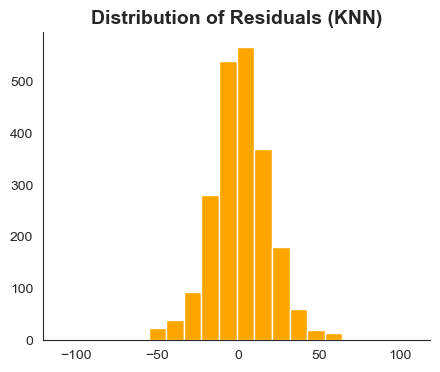

In [36]:
residuals_knn = KNNPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_knn, bins = 20, color = "orange")
    
plt.title(label = "Distribution of Residuals (KNN)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

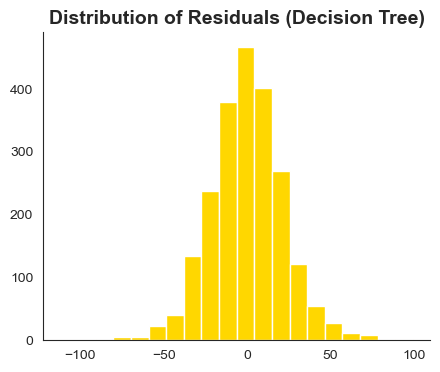

In [37]:
residuals_dt = DTPredictions - Y_train 

sns.set_style("white")
    
plt.figure(figsize=(5,4))
    
plt.hist(residuals_dt, bins = 20, color = "gold")
    
plt.title(label = "Distribution of Residuals (Decision Tree)" , fontsize = 14, weight = 'bold')
    
sns.despine()
    
plt.show()

The KNN model outperforms the Decision Tree model, evident not only from its superior metric values but also from the visually noticeable smaller variance in residuals.

__Saving the Results__

In [38]:
KNN_DT_Results.to_csv(r'KNN_DT_Results.csv', index=True, 
                                              index_label= 'Metrics')